In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)  

**A/B Testing(Also a form of Hypothesis Testing)**

In modern data analytics, deciding whether **TWO NUMERICAL SAMPLES** come from the same underlying distribution is called A/B testing. The name refers to the labels of the two samples, A and B.


**Example**

The table births contains the following variables for 1,174 mother-baby pairs: the baby’s birth weight in ounces, the number of gestational days, the mother’s age in completed years, the mother’s height in inches, pregnancy weight in pounds, and whether or not the mother smoked during pregnancy.

In [2]:
# Read in the data set.

births = Table.read_table('baby.csv')
births

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


**Goal**

One of the aims of the study was to see whether maternal smoking was associated with birth weight. In this example, we have:

- two populations: 
        - Population 1: The population of babies born to smoking mothers.
        - Population 2: The population of babies born to non-smoking mothers.
        
- one population parameter we are comparing across groups: 

        - the weights of babies.

Since we are only concerned about the two columns: _Maternal Smoker_ and _Birth Weight_, let's select the two variables into a table.

In [3]:
smoking_and_birthweight = births.select('Maternal Smoker', 'Birth Weight')
smoking_and_birthweight

Maternal Smoker,Birth Weight
False,120
False,113
True,128
True,108
False,136
False,138
False,132
False,120
True,143
False,140


**Some Descriptive Statistics**

We consider the count of how many mothers are in the two groups.

In [4]:
smoking_and_birthweight.group('Maternal Smoker')

Maternal Smoker,count
False,715
True,459


**Some Descriptive Statistics - Visualization of the distribution of a numerical variable(birth weight) across categories(Maternal Smoker)**

We use a overlapping histograms

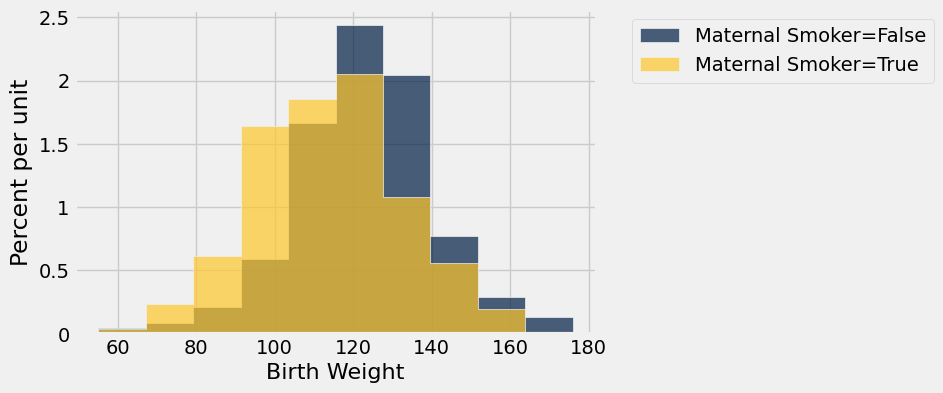

In [5]:
smoking_and_birthweight.hist('Birth Weight', group = 'Maternal Smoker')

**Some Descriptive Statistics**

We consider the **average weights** of babies born to mothers in the two groups.

In [6]:
means_table = smoking_and_birthweight.group('Maternal Smoker', np.average)
means_table

Maternal Smoker,Birth Weight average
False,123.085
True,113.819


**Hypothesis Testing**

## Step 1: Setting up the null and alternative hypotheses for this application problem:

- A test chooses between two views of how data were generated

- The views are called hypotheses: **The Null and the Alternative Hypotheses.**

- The test picks the hypothesis that is better supported by the observed data


**_In this example..._**


**Null Hypothesis:**

In the population, the distribution of birth weights of babies is the same for mothers who don’t smoke as for mothers who do. The difference in the sample is due to chance. (whether a mother smokes or not has no significant effect on birth weight)

**Alternative Hypothesis:**

In the population, the babies of the mothers who smoke have a lower birth weight, on average, than the babies of the non-smokers.


## Step 2: Define The Test Statistic and Compute the Observed Value of the Test Statistic

Because we are comparing the difference in weights of babies in the two groups, it makes natural sense that the test statistic should be the difference between the weights of the babies in the two populations.

[Question] What values of our statistic are in favor of the alternative: positive or negative?

#### Compute the Observed Value of the Test Statistic

In [7]:
means_table

Maternal Smoker,Birth Weight average
False,123.085
True,113.819


In [8]:
means = means_table.column(1)
observed_difference = means.item(1) - means.item(0)
observed_difference

-9.266142572024918

We are going compute such differences repeatedly in our later simulations below, so we will define a function to do the job. 

The function takes two arguments:

- the name of the table of data(numerical variable)

- the label of the column that contains the Boolean variable for grouping(categorical variable)

It returns the difference between the means of the True group and the False group.

In [9]:
def difference_of_means(table, num_var, categ_var):
    """Takes: name of table, column label of numerical variable,
    column label of group-label variable
    Returns: Difference of means of the two groups"""
    
    #table with the two relevant columns
    reduced = table.select(num_var, categ_var)  
    
    # table containing group means
    means_table = reduced.group(categ_var, np.average)
    # array of group means
    means = means_table.column(1)
    
    return means.item(1) - means.item(0)

In [10]:
difference_of_means(births, 'Birth Weight', 'Maternal Smoker')

-9.266142572024918

The observed value of the test statistic is about -9.27 ounces.


 # Data Science Question

This raises the question of whether the difference reflects just chance variation or a difference in the distributions in the larger population. 

Could it be that there is no difference between the two distributions in the population, but we are seeing a difference in the samples just because of the mothers who happened to be selected?

# Simulation/Prediction of the Statistic Under the Null Hypothesis

Recall the null hypothesis: 

**Null Hypothesis:**

In the population, the distribution of birth weights of babies is the same for mothers who don’t smoke as for mothers who do. The difference in the sample is due to chance. (whether a mother smokes or not has no significant effect on birth weight)


**How should we simulate test statistic under the null hypothesis?**

## Use the permutation test

## A slight detour: how do you you implement the permutation test?

Let us see an exanple of a permutattion test for testing the difference in birth weight(a numerical variable) across levels of a Maternal Smoker(categorical variable).

In [11]:
letters = Table().with_column('Letter', make_array('a', 'b', 'c', 'd', 'e'))

In [12]:
letters.sample() # .sample() samples with replacement by default

Letter
c
e
e
b
e


In [13]:
letters.sample(with_replacement = False)

Letter
d
e
c
b
a


In [14]:
letters.with_column('Shuffled', letters.sample(with_replacement = False).column(0))

Letter,Shuffled
a,c
b,a
c,e
d,b
e,d


# Simulation Under Null Hypothesis

In [15]:
smoking_and_birthweight

Maternal Smoker,Birth Weight
False,120
False,113
True,128
True,108
False,136
False,138
False,132
False,120
True,143
False,140


In [16]:
shuffled_labels = smoking_and_birthweight.sample(with_replacement=False
                                                ).column('Maternal Smoker')

In [17]:
original_and_shuffled = smoking_and_birthweight.with_column(
    'Shuffled Label', shuffled_labels
)

In [18]:
original_and_shuffled

Maternal Smoker,Birth Weight,Shuffled Label
False,120,False
False,113,False
True,128,False
True,108,True
False,136,False
False,138,True
False,132,False
False,120,False
True,143,True
False,140,False


In [19]:
difference_of_means(original_and_shuffled, 'Birth Weight', 'Shuffled Label')

-0.043990432225726295

In [20]:
difference_of_means(original_and_shuffled, 'Birth Weight', 'Maternal Smoker')

-9.266142572024918

# A custom function for your permutation Test

In [21]:
def one_simulated_difference(table, num_var, categ_var):
    """Takes: name of table, column label of numerical variable,
    column label of group-label variable
    Returns: Difference of means of the two groups after shuffling labels"""
    
    # array of shuffled labels
    shuffled_labels = table.sample(with_replacement = False
                                                    ).column(categ_var)
    
    # table of numerical variable and shuffled labels
    shuffled_table = table.select(num_var).with_column(
        'Shuffled Label', shuffled_labels)
    
    return difference_of_means(shuffled_table, num_var, 'Shuffled Label')   
differences = make_array()

for i in np.arange(1000):
    new_difference = one_simulated_difference(births, 'Birth Weight', 'Maternal Smoker')
    differences = np.append(differences, new_difference)

p_value = sum(differences >= observed_difference) / 5000

In [22]:
one_simulated_difference(births, 'Birth Weight', 'Maternal Smoker')

0.29584837820131327

In [23]:
differences = make_array()

for i in np.arange(1000):
    new_difference = one_simulated_difference(births, 'Birth Weight', 'Maternal Smoker')
    differences = np.append(differences, new_difference)

Observed Difference: -9.266142572024918


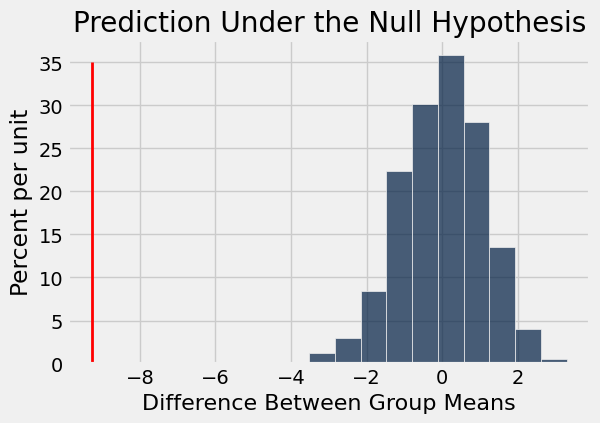

In [24]:
Table().with_column('Difference Between Group Means', differences).hist()
print('Observed Difference:', observed_difference)
plots.title('Prediction Under the Null Hypothesis');
plots.plot([observed_difference, observed_difference], [0, .35], color='red', lw=2);

In [25]:
sum(differences <= observed_difference) / 5000

0.0

In [26]:
min(differences)

-3.5175007998537353